# Prototype
Martina Buck | 4.11.2020

## Goals
1.give a first impression of what the game could look like

2.demonstrate a possible game-mechanism

(All text and game mechanisms are just placeholders until something better comes along.)

**External imports**

In [30]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("ticks")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Own imports from src module**

In [31]:
from src.gecm import game
from src.gecm.field import Map
from src.gecm.dicts import (
        original_lulc_mapping,
        lulc_remapping,
        simplified_lulc_mapping,
        simplified_lulc_mapping_colors
    )

**Parameters**

In [32]:
# size of playing field in pixels
n_pixels = 90

# number of players
number_of_players = 6

**Definitions**

In [33]:
# colormap
simplified_lulc_cm = ListedColormap(
    [simplified_lulc_mapping_colors[x] for x in simplified_lulc_mapping_colors.keys()]
)

# project directory
abspath = os.path.abspath('')
project_dir = str(Path(abspath).parents[0])

# sub-directories
data_raw = os.path.join(project_dir, "data", "raw")
data_processed = os.path.join(project_dir, "data", "processed")
figure_dir = os.path.join(project_dir, "plots")

# path to raster data file (must be a geotiff)
fpath_map = os.path.join(
    data_processed, "NFI_rasterized_{}_{}.tif".format(n_pixels, n_pixels)
)

**Playing field**

In [34]:
# load map
playing_field = Map(
    fpath=fpath_map,
    original_lulc_mapping=original_lulc_mapping,
    simplified_lulc_mapping=simplified_lulc_mapping,
    lulc_remapping=lulc_remapping,
    cmap=simplified_lulc_cm
)

# initialise playing field (crucial, else nothing works!)
playing_field.initialise(granularity=1)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
['#fee090', '#33a02c', '#b2df8a']


## Instructions

Landscape is an ever changing thing. But those changes don't always happen without conflicts. In the following game the players will be part of a group of stakeholders. 

They will take the role as foresters, farmers or business representatives/cartel. To start a new game and give out all the roles, fill in the numbers of players (3 to 6):

In [35]:
game.roles(number_of_players)

There are 6 roles for each player, Farmer 1 and 2, Forester 1 and 2 and Business representatives 1 and 2. Please distribute each role among yourselves


Now have a look at playing field.
You are finding yourselves in Scottland in the area of Galloway and Southern Ayrshire Biosphere. The government decided that more forest area in Scottland is needed to help to combate Climate Change. At the same time the people of Scottland need steady jobs with a decent pay. You find yourself having either Farmland, Forest or a business with money and a demand for agricultural and timber products depending on your choosen role.

<AxesSubplot:title={'center':'Map size: 90 x 90'}, xlabel='x', ylabel='y'>

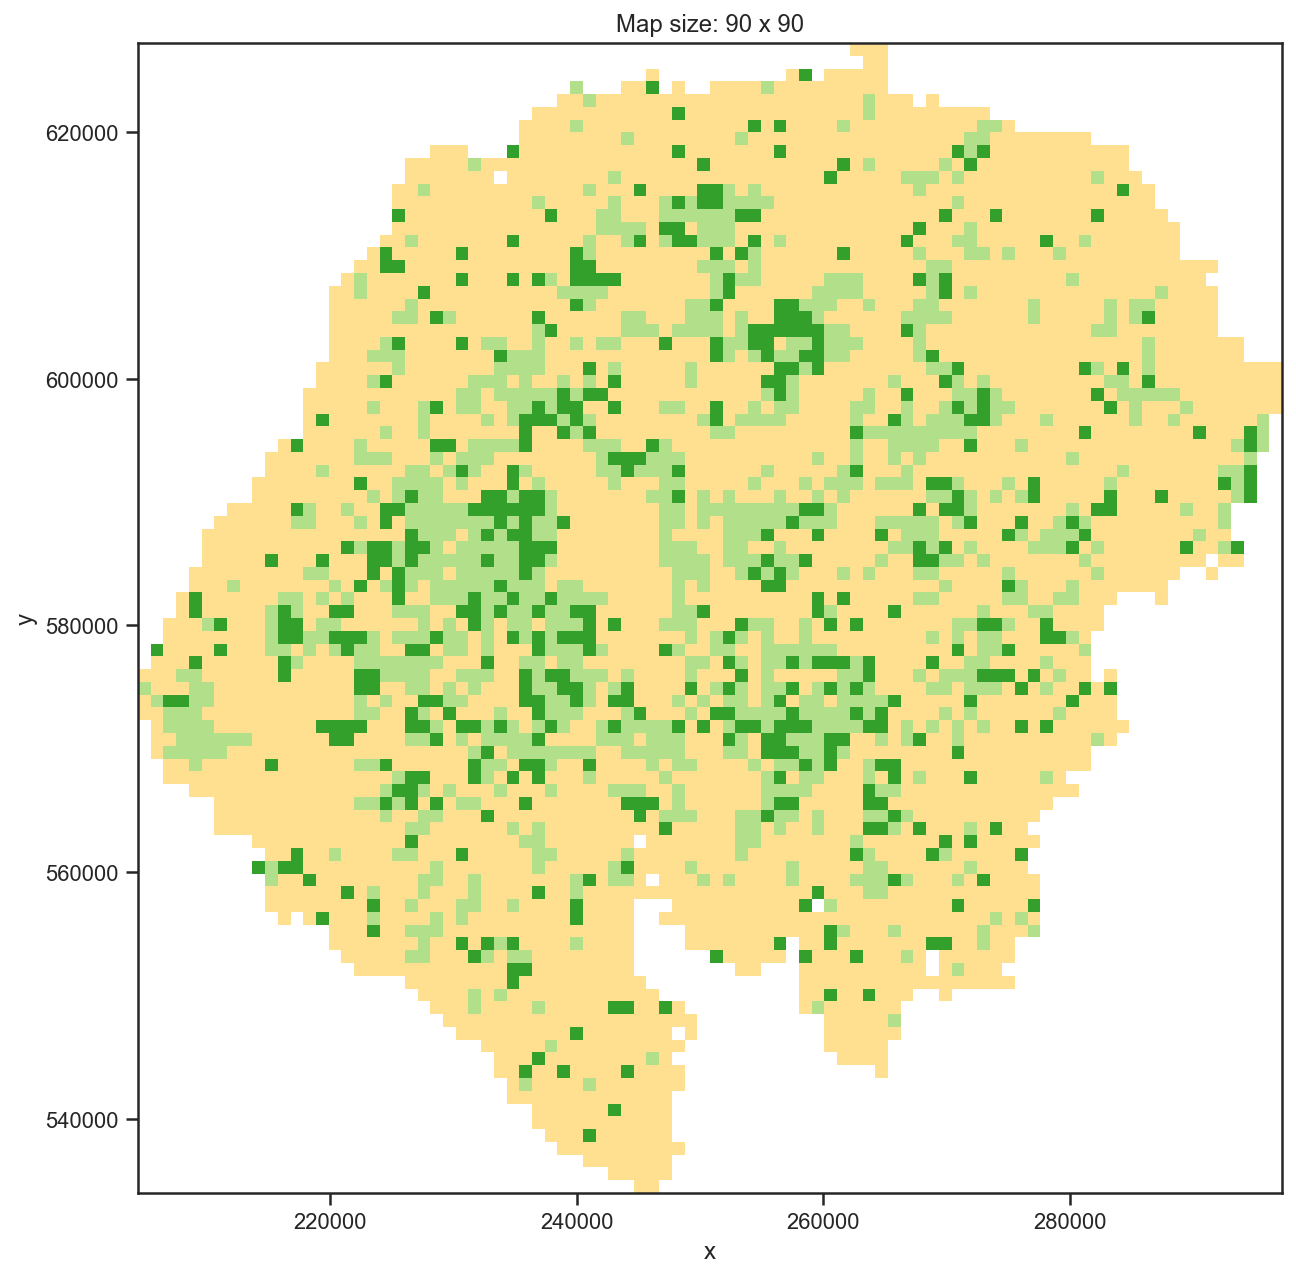

In [36]:
# plot map
playing_field.show(granularity=1)

To play the game, every player fills out his decisions on what to do with his land on the google sheet for his role (maybe we could put here a link but then everyone has acces to everyones decisions...):

The map changes after each decision. To call the map after each round call the function game() with current round as parameter. (i.e.: after the first round call game(1))

In [37]:
# TODO: weave in the Decision-making <-> Map interface coded by Martina & Felix

After playing a few rounds, let's evaluate your current process so far:

In [38]:
# TODO: display current state of important variables: employment, GDP, agricultural area, forest area, ...